# OUTLIERS


--Outliers are observations or datapoints that are distant or abnormal from other observations.

--Outlier can modify the final results.

--Hence, the result may not be accurate. we have to treate the outlier to get accurate results.



CAUSES OF OUTLIERS:
    
    1. INCORRECT ENTRY:-When typing data, the operator would have typed '000' instead of '1000'.
    
    2. MIS_REPORTING:-Intentionally reporting wrong data. For example, A boy exaggerating his salary in matrimony site.
    
    3. SAMPLING ERROR:- Example, while measuring heights of Bengalis, we might have taken height of some punjabis in the 
       sample.
    
    4. EXCEPTIONAL BUT TRUE VALUE:-Sometimes, the outlier may be correct but abnormal. For example, person smoking cigarattes  per day.
       Generally people smoke 2 to 3 cigars but there may be a person who is smoking 20 cigars.

--To perform a outliers on "CARS.csv"

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("D:/ds datatechs/datasets/CARS.csv")

In [3]:
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


Outlier can be detected in 2 ways:
    1.Visual representation.
    2.Inter Quartile Range.

At a time, we analyze 1 column for outliers, this is called "Univariate Analysis"

Visual representation.

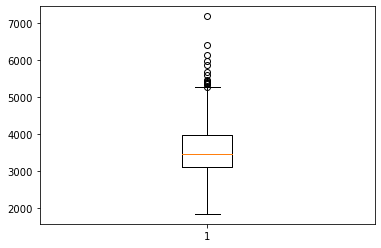

In [9]:

#Let us, find outliers in "Weight"
import matplotlib.pyplot as plt
plt.boxplot(data['Weight'])
plt.show()

From above plot, the outlier is at around 7000.

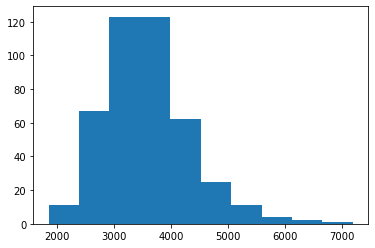

In [10]:
#show histogram
plt.hist(data['Weight'])
plt.show()

 Inter Quartile Range


In [12]:
#Calculate IQR
#first calculate q3 i.e Third quartile
q3=data['Weight'].quantile(0.75)
q3

3977.0

In [13]:
#calculate q1 i.e First quartile
q1=data['Weight'].quantile(0.25)
q1

3105.0

In [14]:
#From q3 and q1, we can calculate IQR
IQR=q3-q1
IQR

872.0

In [15]:
#calculate upper limit and lower limit from IQR
UL=q3+(1.5*IQR)
LL=q1-(1.5*IQR)
print(UL,LL)


5285.0 1797.0


Above value be UL or below LL will be outlier.

In [16]:
#Eliminates value not in the rae of UL-LL using indexing method
true_index=(LL<data['Weight'].values)&(data['Weight'].values<UL)
true_index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [17]:
#delete the rows having outliers and keep remaining
data1=data['Weight'][true_index]
data1

0      4451
1      2778
2      3230
3      3575
4      3880
       ... 
424    3450
425    3653
426    2822
427    3823
428    3823
Name: Weight, Length: 414, dtype: int64

Visualization without outliers

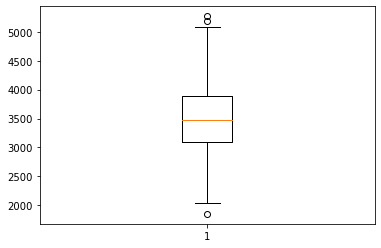

In [18]:
#show boxplot without outliers
plt.boxplot(data1)
plt.show()

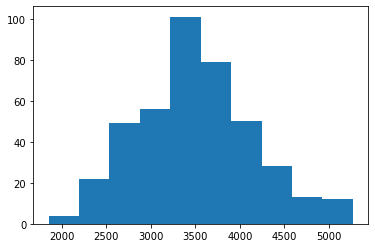

In [19]:
plt.hist(data1)
plt.show()

Sometimes we may not want to delete the row containing outlier.
It is better to substitute mean or median value in that place

In [20]:
mid=np.median(data['Weight'][true_index])
mid

3466.5